In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('spam.csv')

In [ ]:
df.sample(5)

,email,label
762,on tue NUMBER sep NUMBER thosstew URL wrote kl...,0
2248,url URL date not supplied a new census of the ...,0
2390,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0
1590,gary funck gary intrepid com NUMBER NUMBER NUM...,0
1425,hi i ve just installed spamassassin and releva...,0


In [ ]:
df.shape

(3000, 2)

In [ ]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#4.Model Building
#5.Evaluvation
#6.Improvement
#7.Website
#8.Deploy

##1.Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
df.rename(columns={'email':'text','label':'target'},inplace=True)
df.sample(5)

,text,target
2772,prulife universal protector and prulife unive...,1
713,gary lawrence murphy wrote and say hello to th...,0
371,reza b far ebuilt wrote problems why do most c...,0
2480,richie as i understand it post NUMBER NUMBERx...,0
2453,on sun NUMBER NUMBER NUMBER at NUMBER NUMBER g...,0


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_file.csv' with your actual file)
# df = pd.read_csv('your_file.csv')

# Identify the row(s) where 'email' is null
extra_label_row = df[df['text'].isnull()]

# Display the row with the extra label
print("Extra label row(s):")
display(extra_label_row)

# Optionally: Remove the row with the missing 'email'
df_cleaned = df[df['text'].notnull()]

# Display the cleaned dataset info
print("\nAfter cleaning:")
print(df_cleaned.info())

# Save the cleaned DataFrame (optional)
# df_cleaned.to_csv('cleaned_file.csv', index=False)


Extra label row(s):


,text,target
2966,NaN,1



After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2999 non-null   object
 1   target  2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB
None


In [ ]:
df.isnull().sum()

,0
text,1
target,0


In [ ]:
# Drop rows where 'text' is null
df = df.dropna(subset=['text'])

# Verify null values are handled
print(df.isnull().sum())


text      0
target    0
dtype: int64


In [ ]:
df.duplicated().sum()

127

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2872, 2)

##2.EDA

In [ ]:
df.head()

,text,target
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
df['target'].value_counts()

,count
target,
0,2445
1,427


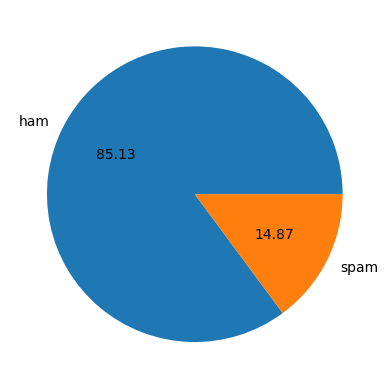

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install nltk

In [ ]:
df['text'].apply(len)#gives number of characters in each email

,text
0,1522
1,643
2,1509
3,1015
4,771
...,...
2995,561
2996,468
2997,864
2998,4129


In [ ]:
df['num_characters']=df['text'].apply(len)
df.head()

,text,target,num_characters
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771


In [ ]:
nltk.download('punkt_tab')
df['text'].apply(lambda x:nltk.word_tokenize(x))#generates a list of words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text
0,"[date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE..."
1,"[martin, a, posted, tassos, papadopoulos, the,..."
2,"[man, threatens, explosion, in, moscow, thursd..."
3,"[klez, the, virus, that, won, t, die, already,..."
4,"[in, adding, cream, to, spaghetti, carbonara, ..."
...,...
2995,"[abc, s, good, morning, america, ranks, it, th..."
2996,"[hyperlink, hyperlink, hyperlink, let, mortgag..."
2997,"[thank, you, for, shopping, with, us, gifts, f..."
2998,"[the, famous, ebay, marketing, e, course, lear..."


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()


,text,target,num_characters,num_words
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257
1,martin a posted tassos papadopoulos the greek ...,0,643,113
2,man threatens explosion in moscow thursday aug...,0,1509,256
3,klez the virus that won t die already the most...,0,1015,169
4,in adding cream to spaghetti carbonara which ...,0,771,144


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x :len( nltk.sent_tokenize(x)))
df.head()


,text,target,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2872.000000,2872.000000,2872.000000
mean,1438.809889,240.099582,0.999652
std,5020.272938,573.146438,0.018660
min,1.000000,0.000000,0.000000
25%,394.000000,69.000000,1.000000
50%,769.000000,136.000000,1.000000
75%,1362.250000,238.000000,1.000000
max,200408.000000,13309.000000,1.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2445.000000,2445.000000,2445.0
mean,1249.902249,218.635174,1.0
std,3130.961790,521.829071,0.0
min,5.000000,1.000000,1.0
25%,366.000000,65.000000,1.0
50%,737.000000,130.000000,1.0
75%,1292.000000,231.000000,1.0
max,82994.000000,13309.000000,1.0


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,427.000000,427.000000,427.000000
mean,2520.494145,363.004684,0.997658
std,10594.202434,796.151261,0.048393
min,1.000000,0.000000,0.000000
25%,564.500000,96.000000,1.000000
50%,982.000000,165.000000,1.000000
75%,2036.500000,354.000000,1.000000
max,200408.000000,11602.000000,1.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

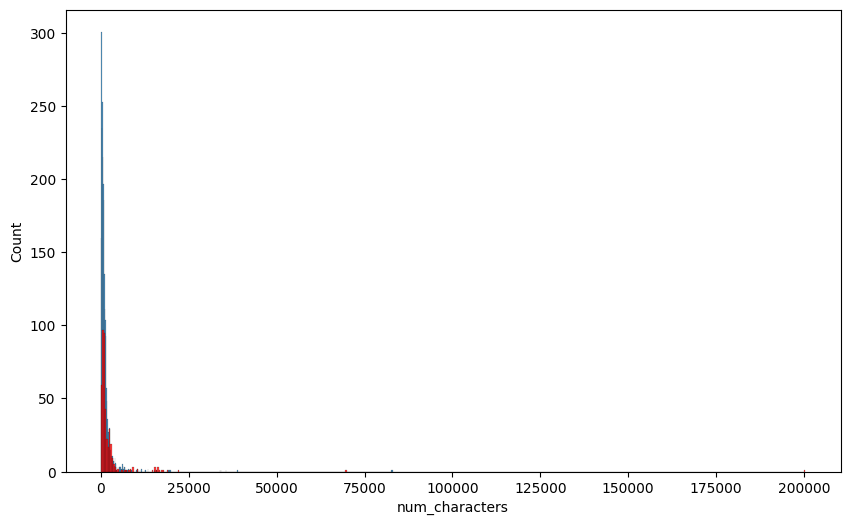

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

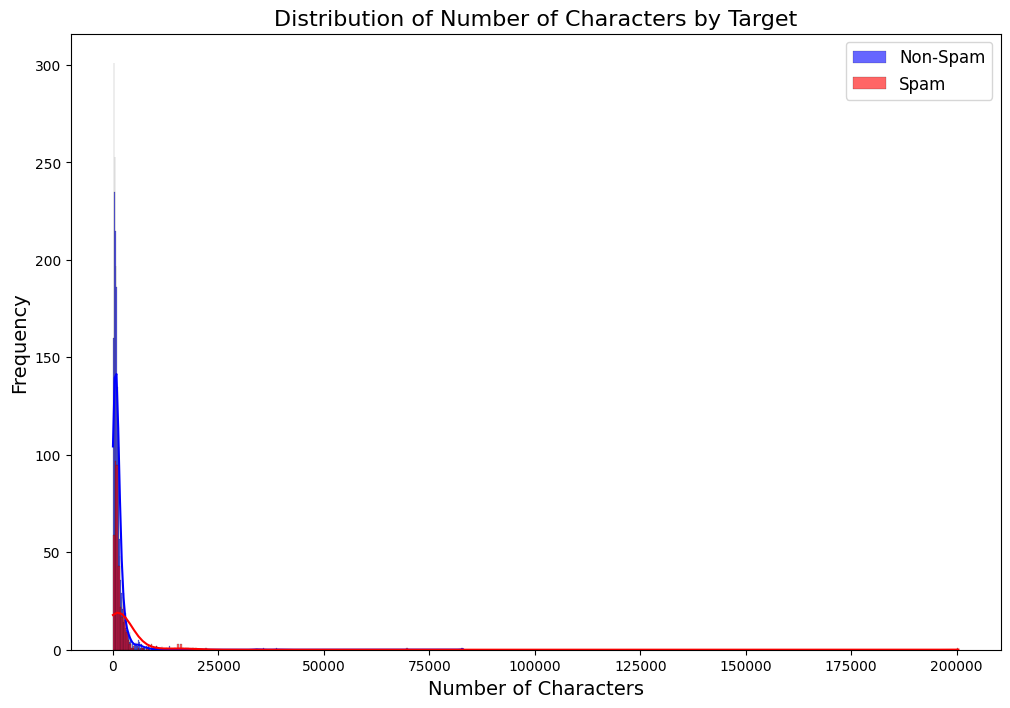

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust the figure size

# Plot histograms for 'target' == 0 and 'target' == 1
sns.histplot(df[df['target'] == 0]['num_characters'], label='Non-Spam', color='blue', alpha=0.6, kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam', color='red', alpha=0.6, kde=True)

# Add labels and legend
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16)
plt.legend(fontsize=12)
plt.show()


<Axes: xlabel='num_words', ylabel='Count'>

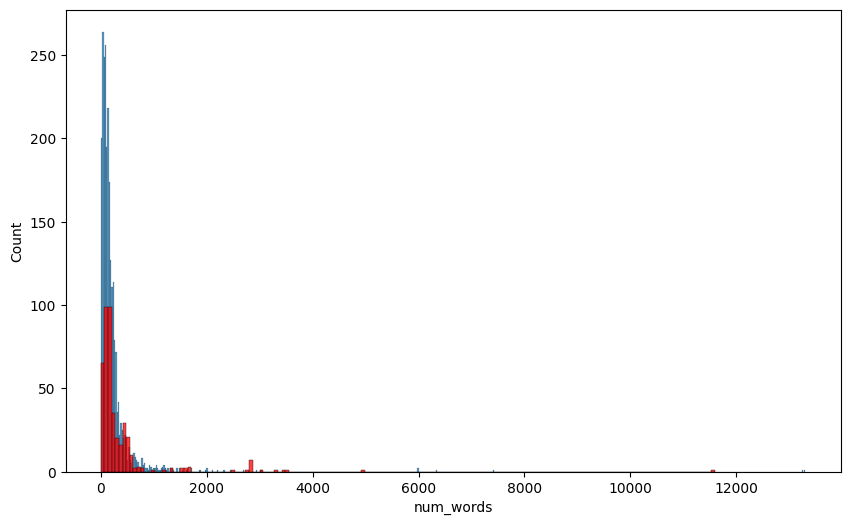

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

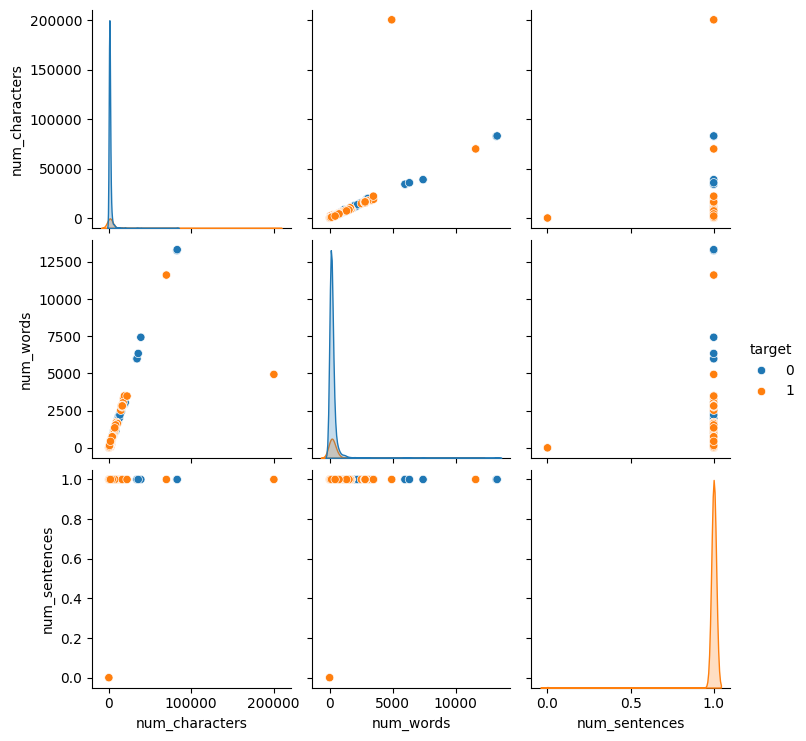

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.head()


,text,target,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1


In [ ]:
# # Select only numeric columns for correlation
# numeric_df = df.select_dtypes(include=[float, int])
# sns.heatmap(numeric_df.corr(), annot=True)


In [ ]:
# # Convert columns to numeric, forcing errors to NaN
# df = df.apply(pd.to_numeric, errors='coerce')

# # Fill NaN values with the mean or any other method
# df.fillna(df.mean(), inplace=True)

# # Then compute the correlation heatmap
# sns.heatmap(df.corr(), annot=True)

## 3.Data Preprocessing


In [ ]:
#lower case
#tokenization
#removing special characters
#removing stop words and punctuation
#stemming

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))



    return " ".join(y)


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# transform_text('I loved the YT lectures on Machine Learning . How about you?')

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


In [ ]:
df.head(1)

,text,target,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...


In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

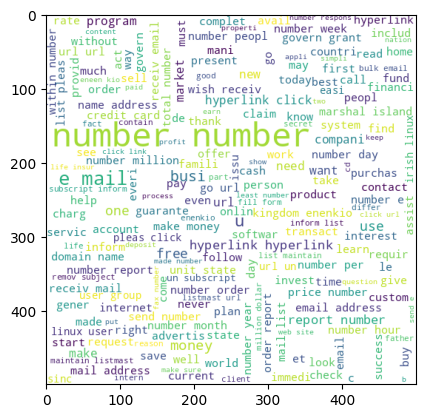

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

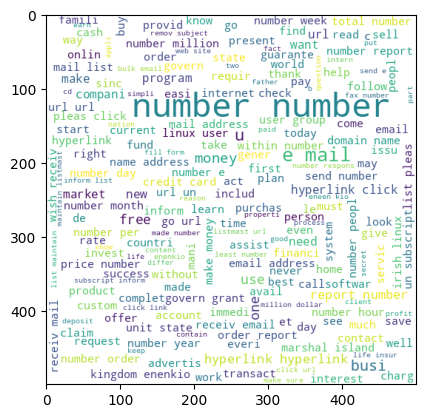

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

93009

In [ ]:
import pandas as pd

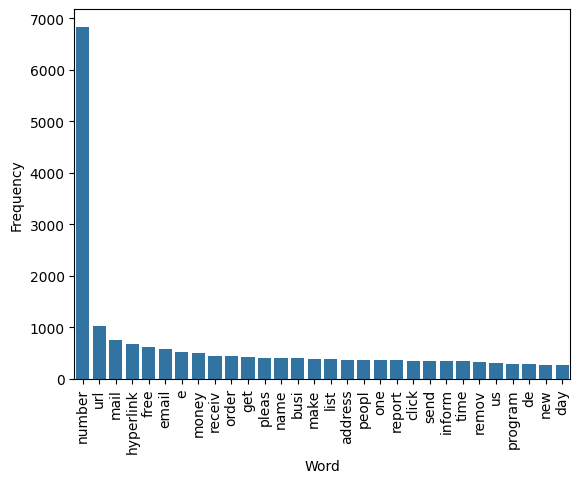

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with word counts
word_freq_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the bar plot with explicit x and y
sns.barplot(x='Word', y='Frequency', data=word_freq_df)

# Adjust the plot for better visualization
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

313103

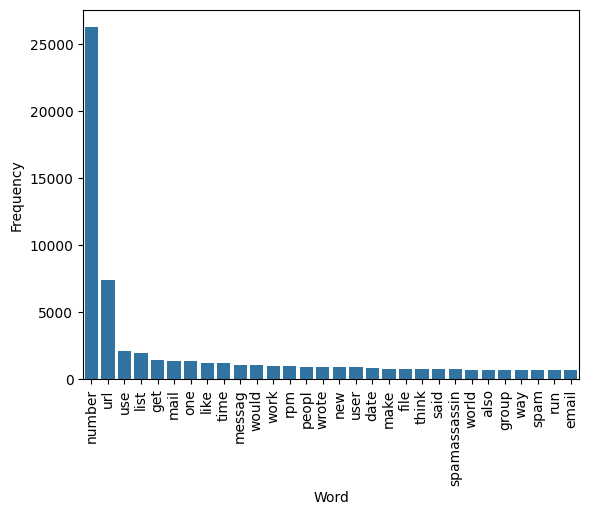

In [ ]:
# Create a DataFrame with word counts
word_freq_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the bar plot with explicit x and y
sns.barplot(x='Word', y='Frequency', data=word_freq_df_ham)

# Adjust the plot for better visualization
plt.xticks(rotation='vertical')
plt.show()


## 4.Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [ ]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
X.shape

(2872, 24994)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.92
[[462  15]
 [ 31  67]]
0.8170731707317073


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9652173913043478
[[477   0]
 [ 20  78]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8747826086956522
[[466  11]
 [ 61  37]]
0.7708333333333334


In [ ]:
#tfidf->MNB

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision


In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For",name)
  print(f"{name} Accuracy: {current_accuracy}")
  print(f"{name} Precision: {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

For SVC
SVC Accuracy: 0.9826086956521739
SVC Precision: 0.9888888888888889
For KN
KN Accuracy: 0.9391304347826087
KN Precision: 0.7837837837837838
For NB
NB Accuracy: 0.8417391304347827
NB Precision: 1.0
For DT
DT Accuracy: 0.9408695652173913
DT Precision: 0.8555555555555555
For LR
LR Accuracy: 0.9443478260869566
LR Precision: 0.9852941176470589
For RF
RF Accuracy: 0.96
RF Precision: 0.987012987012987
For AdaBoost
AdaBoost Accuracy: 0.9704347826086956
AdaBoost Precision: 0.9764705882352941
For BgC
BgC Accuracy: 0.96
BgC Precision: 0.8787878787878788
For ETC
ETC Accuracy: 0.9547826086956521
ETC Precision: 0.9736842105263158
For GBDT
GBDT Accuracy: 0.9756521739130435
GBDT Precision: 0.9883720930232558
For xgb
xgb Accuracy: 0.9808695652173913
xgb Precision: 0.9887640449438202


,Algorithm,Accuracy,Precision
2,NB,0.841739,1.000000
0,SVC,0.982609,0.988889
10,xgb,0.980870,0.988764
9,GBDT,0.975652,0.988372
5,RF,0.960000,0.987013
4,LR,0.944348,0.985294
6,AdaBoost,0.970435,0.976471
8,ETC,0.954783,0.973684
7,BgC,0.960000,0.878788
3,DT,0.940870,0.855556


In [ ]:
df.shape


(2872, 6)

In [ ]:

tfidf=TfidfVectorizer(max_features=1000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} Accuracy: {current_accuracy}")
  print(f"{name} Precision: {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df["accuracy_max_ft_1000"]=accuracy_scores
performance_df["precision_max_ft_1000"]=precision_scores
performance_df

tfidf=TfidfVectorizer(max_features=2000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} Accuracy: {current_accuracy}")
  print(f"{name} Precision: {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df["accuracy_max_ft_2000"]=accuracy_scores
performance_df["precision_max_ft_2000"]=precision_scores
performance_df

tfidf=TfidfVectorizer(max_features=2872)
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} Accuracy: {current_accuracy}")
  print(f"{name} Precision: {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df["accuracy_max_ft_2872"]=accuracy_scores
performance_df["precision_max_ft_2872"]=precision_scores
performance_df

SVC Accuracy: 0.9808695652173913
SVC Precision: 0.978021978021978
KN Accuracy: 0.9634782608695652
KN Precision: 0.9139784946236559
NB Accuracy: 0.9756521739130435
NB Precision: 0.9883720930232558
DT Accuracy: 0.9304347826086956
DT Precision: 0.9027777777777778
LR Accuracy: 0.9634782608695652
LR Precision: 1.0
RF Accuracy: 0.9773913043478261
RF Precision: 0.9885057471264368
AdaBoost Accuracy: 0.9634782608695652
AdaBoost Precision: 0.9529411764705882
BgC Accuracy: 0.9617391304347827
BgC Precision: 0.8877551020408163
ETC Accuracy: 0.9704347826086956
ETC Precision: 0.9764705882352941
GBDT Accuracy: 0.9617391304347827
GBDT Precision: 0.9871794871794872
xgb Accuracy: 0.9843478260869565
xgb Precision: 0.978494623655914
SVC Accuracy: 0.9808695652173913
SVC Precision: 0.978021978021978
KN Accuracy: 0.9669565217391304
KN Precision: 0.9157894736842105
NB Accuracy: 0.9756521739130435
NB Precision: 0.9883720930232558
DT Accuracy: 0.9408695652173913
DT Precision: 0.8478260869565217
LR Accuracy: 0.95

,Algorithm,Accuracy,Precision,accuracy_max_ft_1000,precision_max_ft_1000,accuracy_max_ft_2000,precision_max_ft_2000,accuracy_max_ft_2872,precision_max_ft_2872
2,NB,0.841739,1.000000,0.980870,0.978022,0.980870,0.978022,0.982609,0.988889
0,SVC,0.982609,0.988889,0.963478,0.913978,0.966957,0.915789,0.968696,0.908163
10,xgb,0.980870,0.988764,0.975652,0.988372,0.975652,0.988372,0.965217,1.000000
9,GBDT,0.975652,0.988372,0.930435,0.902778,0.940870,0.847826,0.940870,0.900000
5,RF,0.960000,0.987013,0.963478,1.000000,0.951304,0.986111,0.946087,0.985507
4,LR,0.944348,0.985294,0.977391,0.988506,0.977391,0.977528,0.973913,0.988235
6,AdaBoost,0.970435,0.976471,0.963478,0.952941,0.966957,0.975904,0.970435,0.987952
8,ETC,0.954783,0.973684,0.961739,0.887755,0.965217,0.890000,0.965217,0.906250
7,BgC,0.960000,0.878788,0.970435,0.976471,0.973913,0.977011,0.960000,0.974684
3,DT,0.940870,0.855556,0.961739,0.987179,0.972174,0.988095,0.972174,0.988095


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
import pickle

# Save the TFIDF vectorizer and model in binary write mode
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

